In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import seaborn as sns
instapouf = pd.read_csv("instapouf.csv", sep=",")
print(instapouf)

         date  abo
0  2021-05-17  245
1  2021-05-24  324
2  2021-05-31  382
3  2021-06-04  400
4  2021-06-23  500
5  2021-07-03  530
6  2021-07-07  560
7  2021-07-08  570
8  2021-07-13  580


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast']


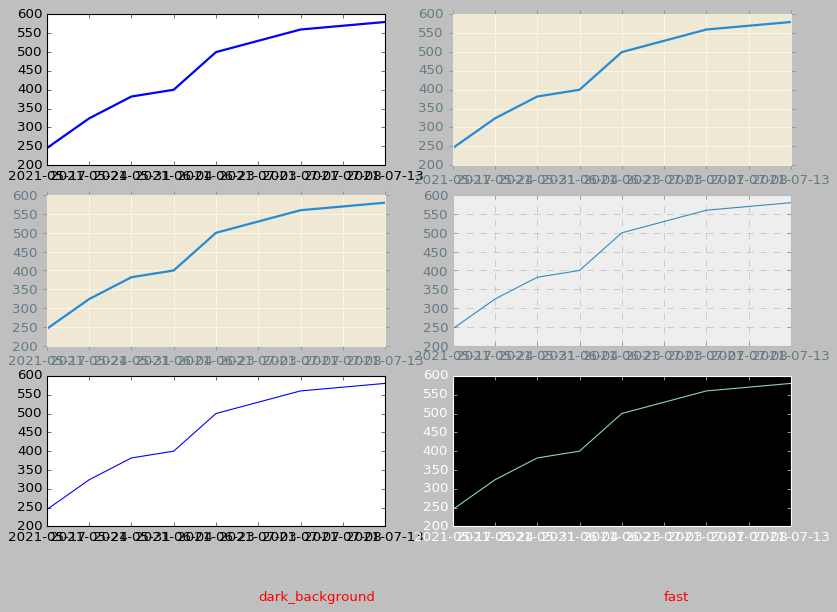

In [5]:
print(plt.style.available[:6])

# Notez la taille de la figure
fig = plt.figure(figsize=(12,8))
for i in range(6):
    # On peut ajouter des sous graphes ainsi
    fig.add_subplot(3,2,i+1)
    plt.style.use(plt.style.available[i])
    plt.plot(instapouf['date'], instapouf['abo'])
    
    # Pour ajouter du texte
    plt.text(s=plt.style.available[i], x=5, y=2, color='red')

